# Blood Pressure and Arterial Function Laboratory data flow diagram

Constructed for data management plan documents.

List of node images: https://diagrams.mingrammer.com/docs/nodes/onprem

In [2]:
from diagrams import Cluster, Diagram, Edge
from diagrams.aws.business import BusinessApplications, AlexaForBusiness
from diagrams.aws.devtools import ToolsAndSdks
from diagrams.aws.general import Client
from diagrams.aws.security import Detective
from diagrams.azure.general import Templates, Servicehealth
from diagrams.azure.identity import Users
from diagrams.azure.web import APIConnections, AppServiceDomains
from diagrams.custom import Custom
from diagrams.generic.os import Windows
from diagrams.onprem.vcs import Github
from diagrams.programming.language import Python
import textwrap as tr

graph_attr = {
    "layout":"dot",
    "compound":"true",
    "splines": "spline",
    }

node_attr = {
    "fontsize": "14",
    "fontname": "Atkinson Hyperlegible",
}

filename = "data_flow"
outformat = "svg"
full_filename = "{filename}.{outformat}"


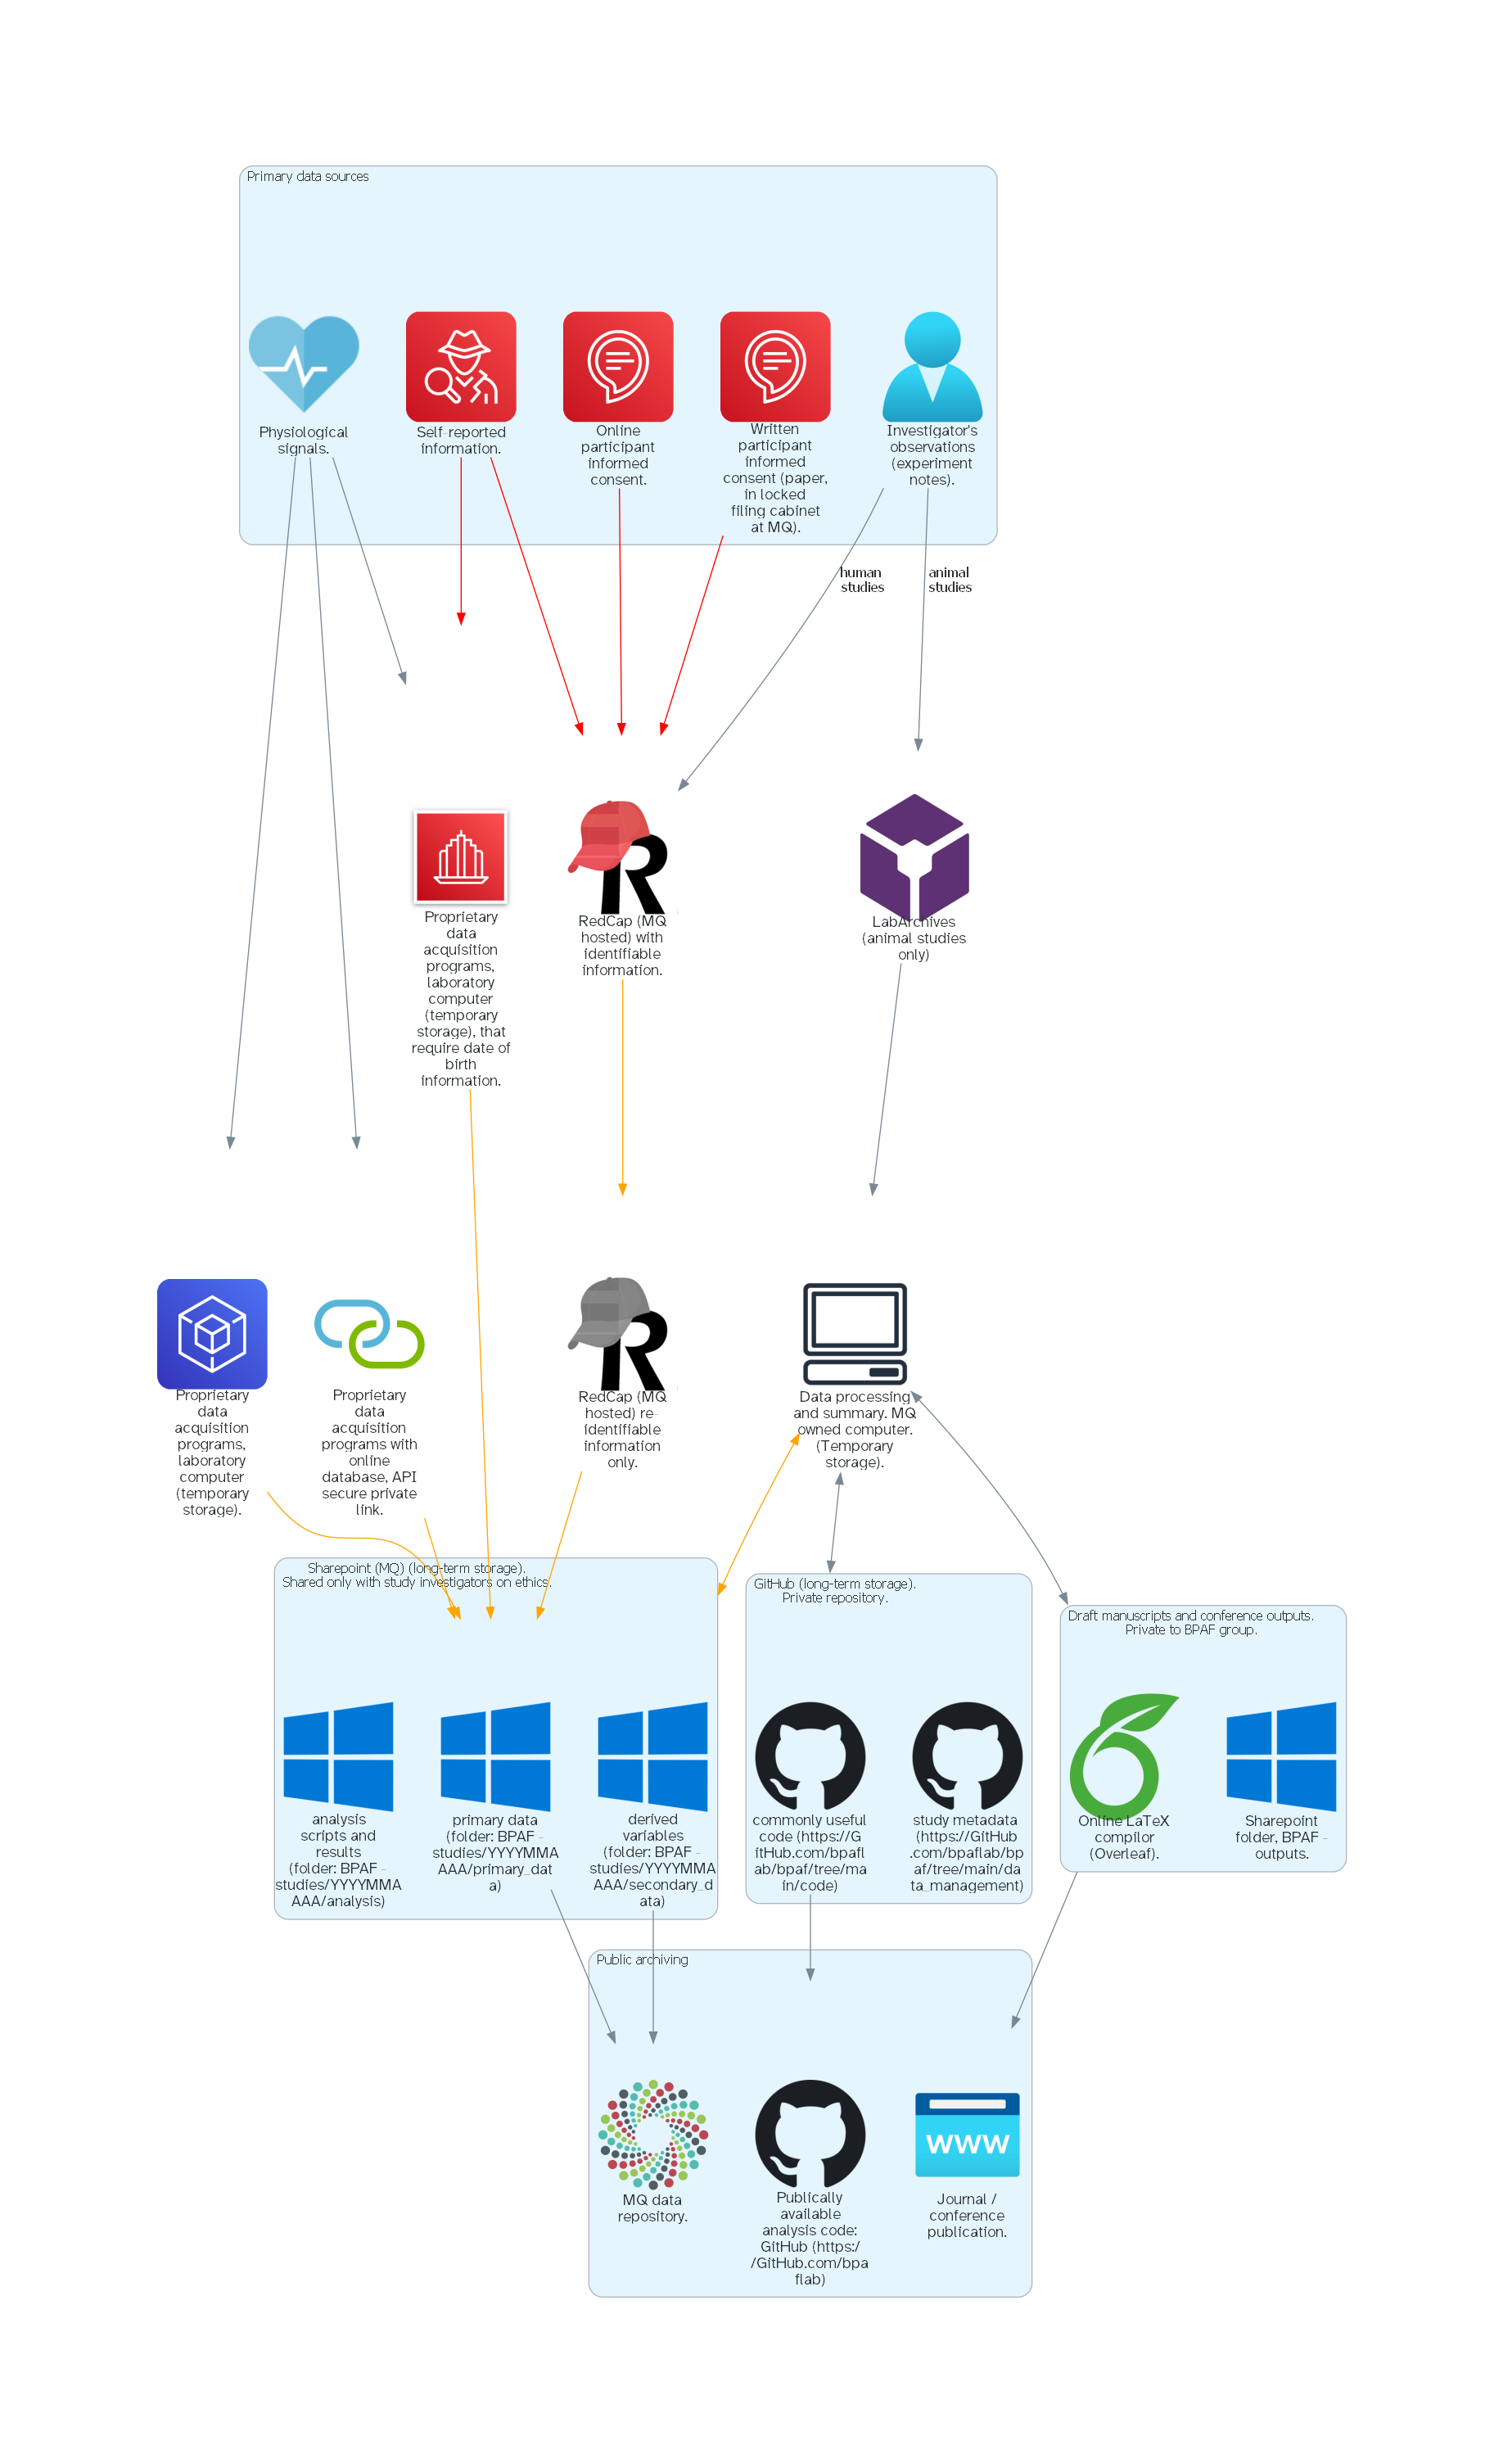

In [5]:
with Diagram("", direction="TB", filename=filename, show=False, graph_attr=graph_attr, node_attr=node_attr, outformat=outformat) as diag:
    diag.dot.renderer = "cairo"

    with Cluster("Primary data sources"):
        signals = Servicehealth(tr.fill("Physiological signals.", width=15))
        consent_online = AlexaForBusiness(
            tr.fill("Online participant informed consent.", width=15))
        consent_paper = AlexaForBusiness(tr.fill(
            "Written participant informed consent (paper, in locked filing cabinet at MQ).", width=15))
        surveys = Detective(tr.fill("Self-reported information.", width=15))
        notes = Users(
            tr.fill("Investigator's observations (experiment notes).", width=15))

    proprietary_online = APIConnections(tr.fill(
        "Proprietary data acquisition programs with online database, API secure private link.", width=15))

    # with Cluster("1", graph_attr={"label": "Laboratory computer (temporary storage)"}):
    proprietary_dob = BusinessApplications(tr.fill(
        "Proprietary data acquisition programs, laboratory computer (temporary storage), that require date of birth information.", width=15))
    proprietary = ToolsAndSdks(
        tr.fill("Proprietary data acquisition programs, laboratory computer (temporary storage).", width=15))

    # with Cluster("Long term storage"):
    # with Cluster("RedCap, MQ hosted (long-term storage)"):
    redcap = Custom(tr.fill("RedCap (MQ hosted) with identifiable information.",
                    width=15), "./redcap_logo.png")
    redcap_deidentified = Custom(
        tr.fill("RedCap (MQ hosted) re-identifiable information only.", width=15), "./redcap_logo_gs.png")
        # redcap >> redcap_deidentified

    labarchives = Custom(tr.fill("LabArchives (animal studies only)", width=15), "./labarchives.png")

    with Cluster("1", graph_attr={"label": "Sharepoint (MQ) (long-term storage).\nShared only with study investigators on ethics."}):
        sharepoint_secondary = Windows(
            tr.fill("derived variables (folder: BPAF - studies/YYYYMMAAAA/secondary_data)", width=15))
        sharepoint_primary = Windows(
            tr.fill("primary data (folder: BPAF - studies/YYYYMMAAAA/primary_data)", width=15))
        sharepoint_analysis = Windows(
            tr.fill("analysis scripts and results (folder: BPAF - studies/YYYYMMAAAA/analysis)", width=15))

    with Cluster("2", graph_attr={"label": "GitHub (long-term storage).\nPrivate repository."}):
        github_metadata = Github(tr.fill(
            "study metadata (https://GitHub.com/bpaflab/bpaf/tree/main/data_management)", width=15))
        github_code = Github(tr.fill(
            "commonly useful code (https://GitHub.com/bpaflab/bpaf/tree/main/code)", width=15))

    individual_computer = Client(tr.fill(
        "Data processing and summary. MQ owned computer. (Temporary storage).", width=15))

    with Cluster("3", graph_attr={"label": "Draft manuscripts and conference outputs.\nPrivate to BPAF group."}):
        sharepoint_drafts = Windows(tr.fill(
            "Sharepoint folder, BPAF - outputs.", width=15))
        overleaf = Custom(tr.fill(
            "Online LaTeX compilor (Overleaf).", width=15), "./overleaf.png")

    with Cluster("Public archiving"):
        mq_repository = Custom(
            tr.fill("MQ data repository.", width=15), "./figshare.png")
        GitHub = Github(tr.fill(
            "Publically available analysis code: GitHub (https://GitHub.com/bpaflab)", width=15))
        journal = AppServiceDomains(
            tr.fill("Journal / conference publication.", width=15))

    # Links

    surveys >> Edge(color="red") >> redcap
    consent_online >> Edge(color="red") >> redcap
    consent_paper >> Edge(color="red") >> redcap
    redcap_deidentified >> Edge(color="orange") >> sharepoint_primary
    labarchives >> individual_computer
    notes >> Edge(label="human\n studies") >> redcap
    notes >> Edge(label="animal\n studies") >> labarchives

    redcap >> Edge(color="orange") >> redcap_deidentified

    surveys >> Edge(color="red") >> proprietary_dob
    signals >> proprietary_online
    signals >> proprietary
    signals >> proprietary_dob
    proprietary >> Edge(color="orange") >> sharepoint_primary
    proprietary_online >> Edge(color="orange") >> sharepoint_primary
    proprietary_dob >> Edge(color="orange") >> sharepoint_primary

    # sharepoint_primary >> individual_computer

    individual_computer << Edge(lhead='cluster_1', color="orange") >> sharepoint_secondary
    individual_computer << Edge(lhead='cluster_2') >> github_code
    individual_computer <<  Edge(lhead='cluster_3') >> overleaf
    github_code >> GitHub
    sharepoint_primary >> mq_repository
    sharepoint_secondary >> mq_repository

    overleaf >> Edge(ltail='cluster_3') >> journal
diag